<a href="https://colab.research.google.com/github/aacalva/Portafolio/blob/main/fine_tuning_transfer_learning_y_data_augmentation_para_clasificaci_n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Andy Calva

In [ ]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

from google.colab import files, drive

In [ ]:
# Importar archivo .json de kaggler creada desde la cuenta personal en kaggler
!gdown --id 1p_qU0xKD_bsfaYJS2KzuHRuuQIeY6Q5p
# Se indica la ubicacion del token
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"
# descargamos el dataset
!kaggle datasets download -d antobenedetti/animals

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1p_qU0xKD_bsfaYJS2KzuHRuuQIeY6Q5p
To: /content/kaggle.json
100% 65.0/65.0 [00:00<00:00, 291kB/s]
Dataset URL: https://www.kaggle.com/datasets/antobenedetti/animals
License(s): GPL-2.0
animals.zip: Skipping, found more recently modified local copy (use --force to force download)
unzip:  cannot find or open animal.zip, animal.zip.zip or animal.zip.ZIP.


In [ ]:
# descomprimimos el archivo
!unzip animals.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: animals/train/horse/horse2690.jpg  
  inflating: animals/train/horse/horse2691.jpg  
  inflating: animals/train/horse/horse2692.jpg  
  inflating: animals/train/horse/horse2693.jpg  
  inflating: animals/train/horse/horse2694.jpg  
  inflating: animals/train/horse/horse2695.jpg  
  inflating: animals/train/horse/horse2696.jpg  
  inflating: animals/train/horse/horse2697.jpg  
  inflating: animals/train/horse/horse2698.jpg  
  inflating: animals/train/horse/horse2699.jpg  
  inflating: animals/train/horse/horse27.jpg  
  inflating: animals/train/horse/horse270.jpg  
  inflating: animals/train/horse/horse2701.jpg  
  inflating: animals/train/horse/horse2702.jpg  
  inflating: animals/train/horse/horse2703.jpg  
  inflating: animals/train/horse/horse2704.jpg  
  inflating: animals/train/horse/horse2705.jpg  
  inflating: animals/train/horse/horse2706.jpg  
  inflating: animals/train/horse/horse2707.jpg  
  inflating

In [ ]:
# verificamos cuantas imagenes de gatos, perros, elefantes y caballos tenemos en
# la carpeta train
print(len(os.listdir('/content/animals/train/cat')))
print(len(os.listdir('/content/animals/train/dog/')))
print(len(os.listdir('/content/animals/train/elephant/')))
print(len(os.listdir('/content/animals/train/horse/')))
# verificamos cuantas imagenes de gatos, perros, elefantes y caballos tenemos en
# la carpeta val
print(len(os.listdir('/content/animals/val/cat')))
print(len(os.listdir('/content/animals/val/dog')))
print(len(os.listdir('/content/animals/val/elephant')))
print(len(os.listdir('/content/animals/val/horse')))

2737
2627
2730
2705
300
300
299
300


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),  # Capa de dropout para regularización
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),  # Capa de dropout para regularización
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),  # Capa de dropout para regularización
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Capa de dropout para regularización
    tf.keras.layers.Dense(5, activation='softmax')#softmax
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])#categorical_crossentropy


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 74, 74, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 36, 36, 32)       

In [ ]:
TRAINING_DIR = "/content/animals/train"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=1000,
                                                    class_mode='categorical',#categorical
                                                    target_size=(150, 150))

VALIDATION_DIR = "/content/animals/val/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=1000,
                                                              class_mode='categorical',#categorical
                                                              target_size=(150, 150))


Found 13474 images belonging to 5 classes.
Found 1497 images belonging to 5 classes.


In [ ]:
# Note that this may take some time.
history=model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
14/14 [==============================] - 389s 27s/step - loss: 2.8481 - acc: 0.2044 - val_loss: 1.6090 - val_acc: 0.2004
Epoch 2/10
14/14 [==============================] - 375s 26s/step - loss: 1.6054 - acc: 0.2236 - val_loss: 1.5960 - val_acc: 0.3233
Epoch 3/10
14/14 [==============================] - 375s 27s/step - loss: 1.5088 - acc: 0.3672 - val_loss: 1.4947 - val_acc: 0.2792
Epoch 4/10
14/14 [==============================] - 374s 26s/step - loss: 1.3251 - acc: 0.4578 - val_loss: 1.3024 - val_acc: 0.4569
Epoch 5/10
14/14 [==============================] - 364s 26s/step - loss: 1.1047 - acc: 0.5802 - val_loss: 1.1373 - val_acc: 0.5444
Epoch 6/10
14/14 [==============================] - 376s 27s/step - loss: 0.9242 - acc: 0.6521 - val_loss: 0.8772 - val_acc: 0.6640
Epoch 7/10
14/14 [==============================] - 370s 26s/step - loss: 0.8349 - acc: 0.6808 - val_loss: 0.8650 - val_acc: 0.6513
Epoch 8/10
14/14 [==============================] - 378s 26s/step - loss: 0.

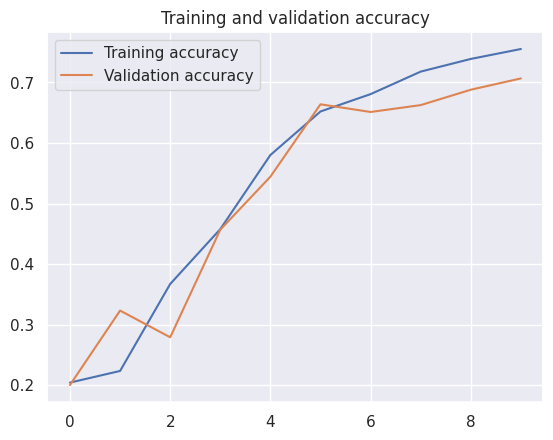

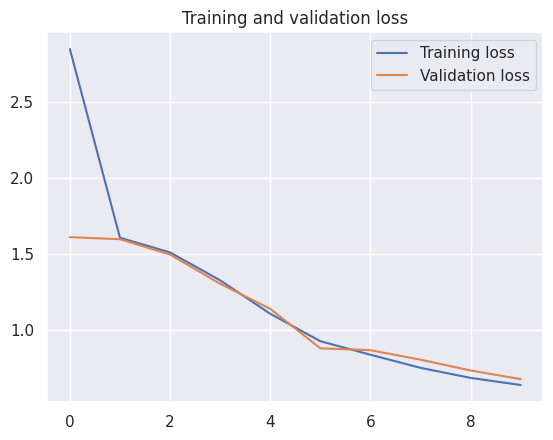

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
# prompt: codigo para valiar si es un gato, perro,  elefante, caballo o leon

# Load the trained model
model = tf.keras.models.load_model('/content/mi_modelo.h5')

# Define the image path
image_path = '/content/animals/inf/lion.jpg'  # Replace with your image path

# Read the image
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))

# Preprocess the image
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# Make prediction
prediction = model.predict(x)

# Get the predicted class
predicted_class = np.argmax(prediction)

# Map the predicted class to the corresponding animal name
class_names = ['cat', 'dog', 'elephant', 'horse', 'lion']
predicted_animal = class_names[predicted_class]

# Print the predicted animal
print(f'Predicted animal: {predicted_animal}')


1/1 [==============================] - 0s 146ms/step
Predicted animal: lion


In [ ]:
import numpy as np
from google.colab import files
import keras.utils as image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = tf.keras.utils.load_img(path, target_size=(150, 150))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])/255
  #print(images)
  classes = model.predict(images, batch_size=10)
  print(classes)
  if(classes[0]> 0.5):
    print("Es un perro")
  else:
    print("es un gato")

KeyboardInterrupt: 

In [ ]:
from keras.models import load_model
model.save('/content/mi_modelo.h5');


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import ResNet50,MobileNet,Xception,MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

# Define the base model
base_model = Xception(weights='imagenet', include_top=False)

In [ ]:
# Add new layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid')(x) #softmax

for layer in base_model.layers:
    layer.trainable = False
# Create the model
model = Model(inputs=base_model.inputs, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])#categorical_crossentropy

# Define data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Prepare the training and validation generators
train_generator = train_datagen.flow_from_directory(
    '/content/cats-v-dogs/training',
    target_size=(299, 299),
    batch_size=256,
    class_mode='binary')#categorical

validation_generator = validation_datagen.flow_from_directory(
    '/content/cats-v-dogs/testing',
    target_size=(299, 299),
    batch_size=256,
    class_mode='binary')#categorical

# Train the model
history = model.fit(
    train_generator,
    epochs=3,
    validation_data=validation_generator,
)

# Evaluate the model
model.evaluate(validation_generator)

In [ ]:
import numpy as np
from google.colab import files
import keras.utils as image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = tf.keras.utils.load_img(path, target_size=(150, 150))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])/255
  #print(images)
  classes = model.predict(images, batch_size=10)
  print(classes)
  if(classes[0]> 0.5):
    print("Es un perro")
  else:
    print("es un gato")

In [ ]:
modelc = Xception(weights='imagenet', include_top=True)

In [ ]:
import numpy as np
from google.colab import files
import keras.utils as image
from keras.applications.resnet50 import preprocess_input, decode_predictions

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = tf.keras.utils.load_img(path, target_size=(299, 299))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])/255
  #print(images)
  classes = modelc.predict(images, batch_size=10)
  print('Predicted:', decode_predictions(classes, top=3)[0])

In [ ]:
print('Predicted:', decode_predictions(predictions, top=3)[0])